## Compare iTSA and MAPS

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from core.core import *

### Result of iTSA

In [2]:
# Kinase and ATP binding proteins
itsa = pd.read_csv('data/iTSA/ITSA_STP_Limma.csv')
kins = pd.read_csv('data/UniprotID_family-Kinase.txt', sep = '\t')
kins = kins['ID'].values
atpb = pd.read_csv('data/UniprotID_ATPbinding.txt', sep = '\t')
atpb = atpb['ID'].values
tars = np.union1d(kins, atpb)

In [3]:
# iTSA Limma
x, y1, y2 = [], [], []
idkins = {}
falpos = {}
for p_val in [0.005, 0.01, 0.05]:
    tab = itsa[itsa['-logAdjPval'] >= -np.log(p_val)]
    sig = tab['Accession'].values
    trues = np.intersect1d(sig, tars)
    falses = np.setdiff1d(sig, tars)
    label = 'iTSA (p < {})'.format(p_val)
    idkins[label] = list(trues)
    falpos[label] = list(falses)
    x.append(label)
    y1.append(len(trues))
    y2.append(len(falses))

### Result of MAPS

In [4]:
# MAPS-iTSA
f = 'results/PL_293T_F_scores.csv'
tab = pd.read_csv(f)
sig = tab[tab['Staurosporine'] >= 0.15]['Accession'].values
trues = np.intersect1d(sig, tars)
falses = np.setdiff1d(sig, tars)
label = 'MAPS-iTSA'
idkins[label] = list(trues)
falpos[label] = list(falses)
x.append(label)
y1.append(len(trues))
y2.append(len(falses))

### Plot results

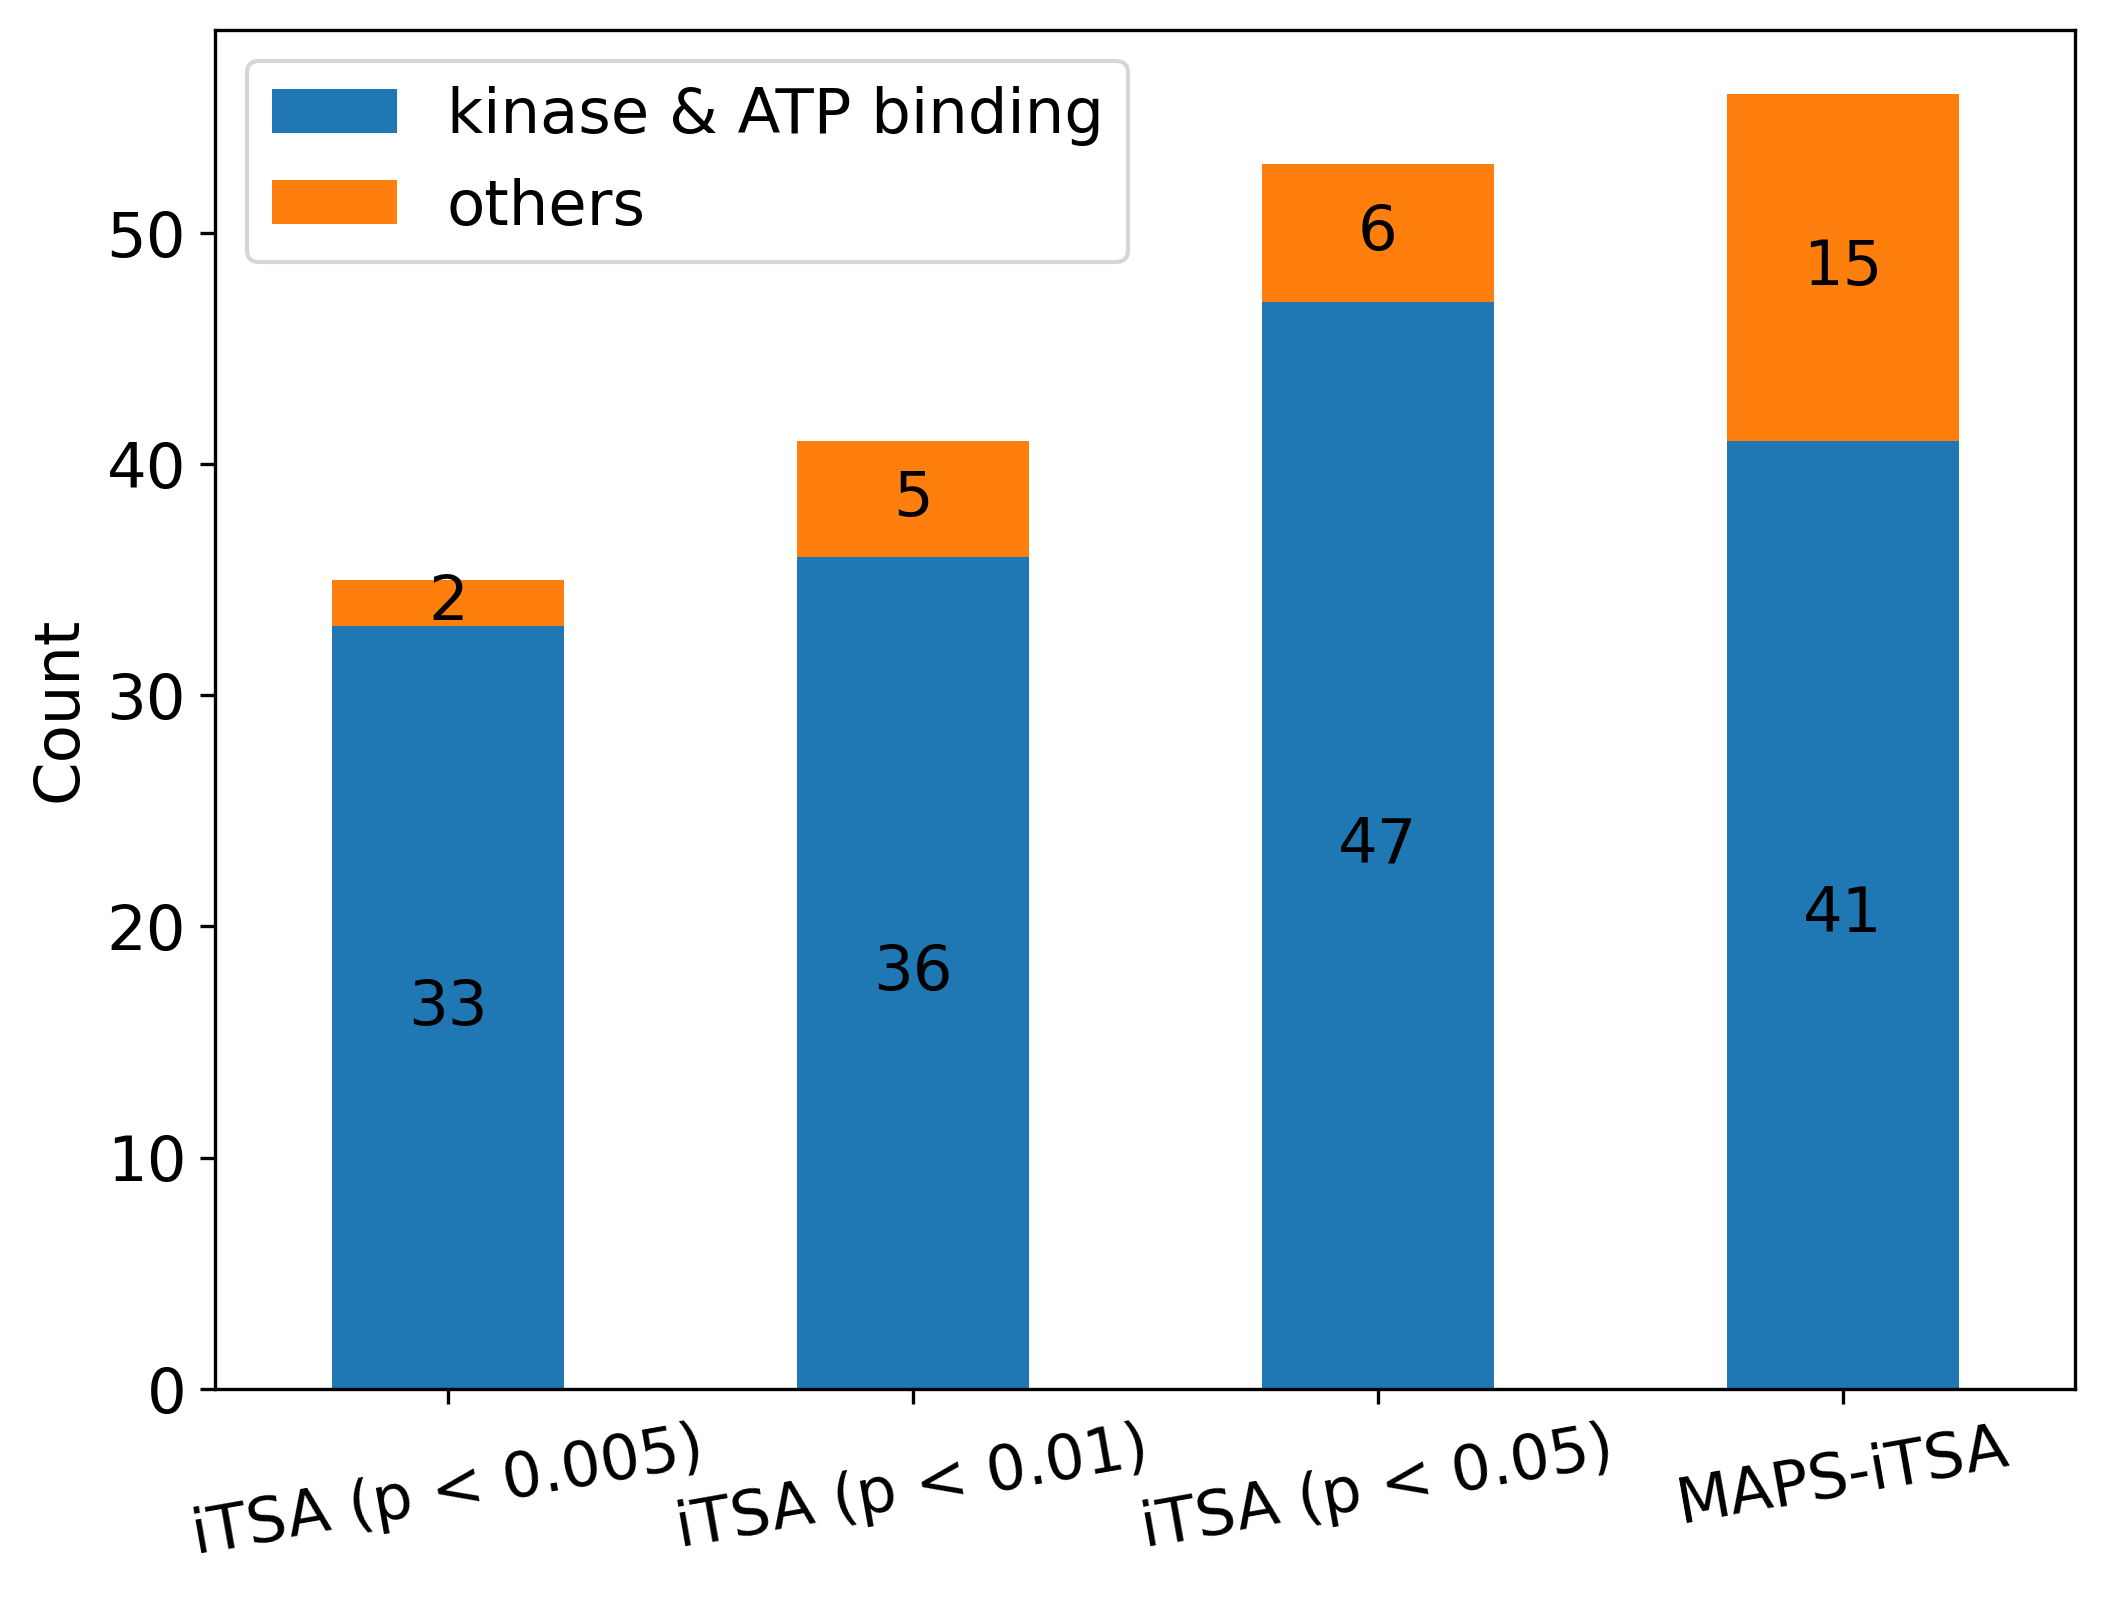

In [5]:
# bar plot
df = pd.DataFrame(data={'kinase & ATP binding': y1, 'others': y2})
df.index = x

plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 15
ax = df.plot(kind='bar', stacked=True, figsize=(8, 6), rot=10, ylabel='Count')
for c in ax.containers:
    labels = np.round([v.get_height() if v.get_height() > 0 else '' for v in c]).astype(int)
    ax.bar_label(c, labels=labels, label_type='center')